In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('/content/MALARIA-CHENGALPET (1).csv')
df.head()

,MONTH,WEEK,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE,MOSQUITO,SPECIES
0,January,1,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,3,2,Pv,imported
1,January,2,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,2,0,Pv,indigenious
2,January,3,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,0,0,Pf,indigenious
3,January,4,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,5,3,3,Pf,imported
4,February,1,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,5,1,0,Pv,imported


In [4]:
#df=df.drop('WEEK',axis=1)

In [5]:
#Label encoding
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['MOSQUITO']= label_encoder.fit_transform(df['MOSQUITO'])
df['SPECIES']= label_encoder.fit_transform(df['SPECIES'])

df['MONTH']= label_encoder.fit_transform(df['MONTH'])


In [6]:
df.head(15)

,MONTH,WEEK,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE,MOSQUITO,SPECIES
0,4,1,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,3,2,1,0
1,4,2,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,2,0,1,1
2,4,3,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,0,0,0,1
3,4,4,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,5,3,3,0,0
4,3,1,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,5,1,0,1,0
5,3,2,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,5,1,1,1,1
6,3,3,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,3,2,0,0,1
7,3,4,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,3,1,0,1,1
8,7,1,93.26,84.19,75.87,74.09,1.3,0,7.06,73.9,3,0,0,1,1
9,7,2,93.26,84.19,75.87,74.09,1.3,0,7.06,73.9,5,0,0,0,0


In [68]:
corr_table=df.corr() 
corr_table

,MONTH,WEEK,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE,MOSQUITO,SPECIES
MONTH,1.000000e+00,1.809456e-17,6.386670e-02,1.019694e-01,1.433940e-01,2.203329e-01,3.436462e-01,3.925062e-01,-1.151276e-01,1.157411e-01,-0.024394,0.164083,0.099620,-0.017922,0.068894
WEEK,1.809456e-17,1.000000e+00,-7.174129e-17,-1.834823e-16,-1.285321e-16,-2.887111e-16,1.465722e-16,1.754971e-16,-1.153130e-16,-8.826218e-17,0.009174,0.004822,0.027670,-0.017539,0.004385
MAX TEMP (deg F),6.386670e-02,-7.174129e-17,1.000000e+00,9.785827e-01,8.603635e-01,5.672210e-01,-2.855081e-01,-1.236253e-01,8.363992e-01,-7.391341e-01,0.005090,-0.298366,-0.184335,0.040786,-0.038687
AVG TEMP,1.019694e-01,-1.834823e-16,9.785827e-01,1.000000e+00,9.136093e-01,6.837549e-01,-1.786533e-01,-2.087512e-02,8.398665e-01,-6.486623e-01,0.010583,-0.233592,-0.142096,0.053048,-0.044117
MIN TEMP,1.433940e-01,-1.285321e-16,8.603635e-01,9.136093e-01,1.000000e+00,7.491749e-01,-1.793882e-02,1.017943e-01,7.517845e-01,-4.559551e-01,0.012013,-0.157724,-0.076129,0.052214,-0.056516
DEW POINT (deg F),2.203329e-01,-2.887111e-16,5.672210e-01,6.837549e-01,7.491749e-01,1.000000e+00,2.138890e-01,2.626825e-01,4.509274e-01,1.078341e-01,0.020222,-0.009692,0.015658,0.046407,-0.049024
PRECIPITATION (in),3.436462e-01,1.465722e-16,-2.855081e-01,-1.786533e-01,-1.793882e-02,2.138890e-01,1.000000e+00,8.587529e-01,-2.689737e-01,5.007063e-01,0.001968,0.353152,0.215580,0.064081,0.013717
RAINY DAYS,3.925062e-01,1.754971e-16,-1.236253e-01,-2.087512e-02,1.017943e-01,2.626825e-01,8.587529e-01,1.000000e+00,-1.362029e-01,3.269386e-01,-0.008159,0.342337,0.210880,0.087392,-0.011044
WIND (mph),-1.151276e-01,-1.153130e-16,8.363992e-01,8.398665e-01,7.517845e-01,4.509274e-01,-2.689737e-01,-1.362029e-01,1.000000e+00,-6.720520e-01,0.006291,-0.227867,-0.146688,0.050997,-0.024155
HUMIDITY (%),1.157411e-01,-8.826218e-17,-7.391341e-01,-6.486623e-01,-4.559551e-01,1.078341e-01,5.007063e-01,3.269386e-01,-6.720520e-01,1.000000e+00,0.002483,0.306355,0.208006,-0.017743,0.016097


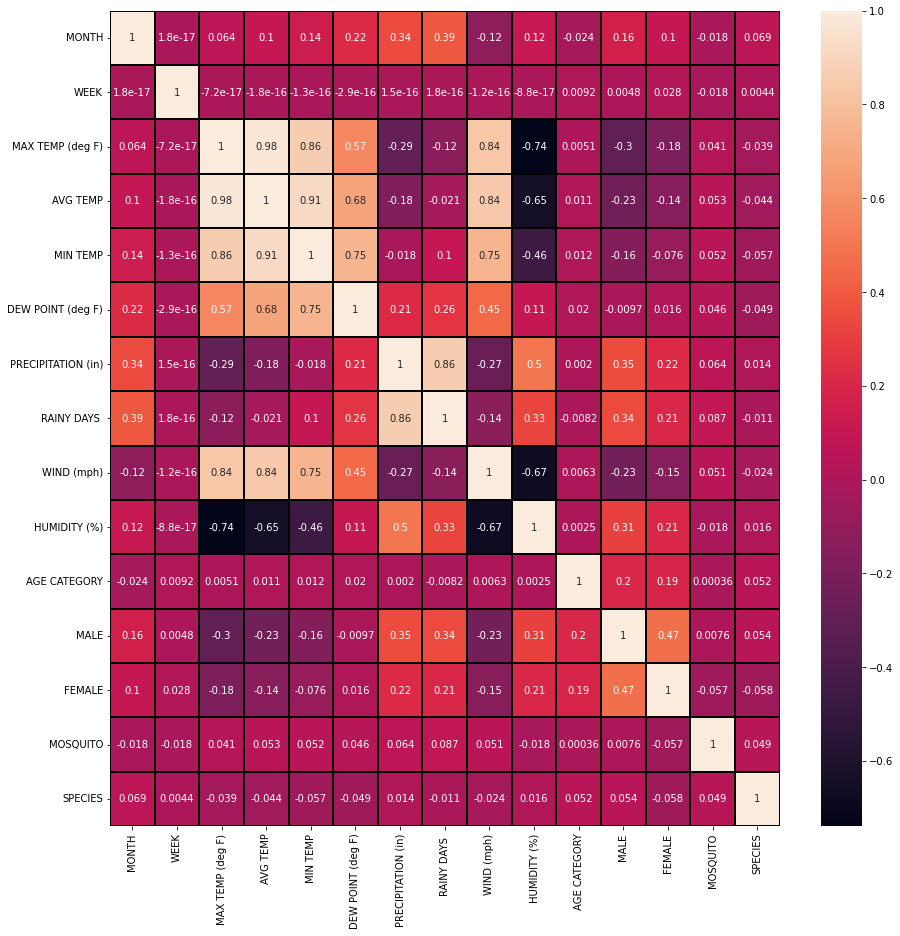

In [72]:
#Data Visualisations
#To see correlation graphically using heatmap
sns.heatmap(df.corr(),annot=True,linecolor ='black', linewidths = 1) 
fig=plt.gcf()
fig.set_size_inches(15,15)

In [7]:
sp=df["SPECIES"]
X_sp=df.iloc[:,0:14] #keeping only species as class label and mosquito is treated as an attribute
X_mo= df.iloc[:,0:13] #keeping only mosquito as class
X_mo["SPECIES"]=sp #adding species
X_sp

,MONTH,WEEK,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE,MOSQUITO
0,4,1,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,3,2,1
1,4,2,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,2,0,1
2,4,3,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,0,0,0
3,4,4,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,5,3,3,0
4,3,1,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,4,94.13,86.61,80.42,78.70,25.5,1,8.67,78.1,1,5,0,1
608,11,1,93.71,87.00,81.33,78.68,33.0,1,8.17,77.4,4,9,1,1
609,11,2,93.71,87.00,81.33,78.68,33.0,1,8.17,77.4,3,5,5,0
610,11,3,93.71,87.00,81.33,78.68,33.0,1,8.17,77.4,3,7,2,1


In [8]:
X_mo.head()

,MONTH,WEEK,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE,SPECIES
0,4,1,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,3,2,0
1,4,2,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,2,0,1
2,4,3,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,3,0,0,1
3,4,4,84.19,77.32,70.94,69.86,41.7,3,5.49,78.9,5,3,3,0
4,3,1,86.82,79.36,71.86,70.66,0.0,0,5.72,76.3,5,1,0,0


In [9]:
#Here we have teo dependent variables MOSQUITO TYPE AND SPECIES  so we will predict the model with respect to each
y2=df['MOSQUITO']
y1=df['SPECIES']



In [10]:
#Designing Testing & Training Dataset
#Since we have two dependent variables
x_train1,x_test1,y_train1,y_test1=train_test_split(X_sp,y1,test_size=0.20,random_state=0)
x_train2,x_test2,y_train2,y_test2=train_test_split(X_mo,y2,test_size=0.20,random_state=0)


In [11]:
x_train1

,MONTH,WEEK,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE,MOSQUITO
90,9,3,85.77,79.14,73.60,72.70,725.40,14,4.94,82.3,5,7,1,1
531,4,4,85.90,79.42,73.87,72.28,162.60,2,5.14,80.0,2,1,1,1
492,0,1,94.30,87.06,80.23,76.57,3.80,1,7.40,72.0,5,0,0,0
200,7,1,91.94,82.52,71.52,68.67,1.51,0,7.32,65.6,5,0,0,0
402,8,3,99.35,90.87,84.84,78.27,26.50,2,9.53,67.7,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,10,2,91.94,83.73,77.00,76.46,210.18,8,5.02,79.9,5,6,3,0
9,7,2,93.26,84.19,75.87,74.09,1.30,0,7.06,73.9,5,0,0,0
359,6,4,99.70,90.24,80.77,74.16,139.30,15,9.26,60.9,5,0,0,1
192,4,1,84.58,77.20,70.35,66.81,8.61,0,6.29,71.5,5,5,1,0


In [12]:
x_test1

,MONTH,WEEK,MAX TEMP (deg F),AVG TEMP,MIN TEMP,DEW POINT (deg F),PRECIPITATION (in),RAINY DAYS,WIND (mph),HUMIDITY (%),AGE CATEGORY,MALE,FEMALE,MOSQUITO
579,4,4,87.35,80.58,74.71,74.82,23.70,0,5.49,83.5,5,2,1,0
52,3,1,86.29,78.30,70.07,70.34,79.15,2,6.13,78.4,5,3,2,1
534,3,3,86.50,78.18,70.39,66.92,31.50,1,5.67,69.8,5,3,2,0
348,0,1,99.03,89.18,82.70,77.91,0.50,0,7.35,70.6,2,0,0,1
55,3,4,86.29,78.30,70.07,70.34,79.15,2,6.13,78.4,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,8,3,99.65,90.72,84.03,78.10,0.00,0,8.45,67.9,5,1,0,0
375,10,4,91.13,84.05,76.19,77.49,388.49,13,5.70,81.3,4,4,2,0
607,1,4,94.13,86.61,80.42,78.70,25.50,1,8.67,78.1,1,5,0,1
165,6,2,96.40,87.91,81.23,70.68,165.00,7,9.35,58.2,3,0,0,1


LINEAR REGRESSION

In [13]:
#Fitting all four 
lr1=LinearRegression()
lr2=LinearRegression()
#lr3=LinearRegression()
#lr4=LinearRegression()

log_reg1=lr1.fit(x_train1,y_train1)
log_reg2=lr2.fit(x_train2,y_train2)



In [14]:
#notation y_pred12 means model no 1 and for species
#notation y_pred11 means model no1 and attribute mosquito type
#With respect to all four mosquitos
y_pred11=log_reg1.predict(x_test1)
y_pred12=log_reg2.predict(x_test2)



In [16]:
from sklearn.metrics import accuracy_score

In [15]:
print("R2 Score with respect to Species class :" ,r2_score(y_test1,y_pred11))
print("Mean Square Error with respect to Species class  :" ,np.sqrt(mean_squared_error(y_test1,y_pred11)))
#print("Accuracy with respect to Species class:",accuracy_score(y_test1, y_pred11))
print()
print("R2 Score with respect to Mosquito:" ,r2_score(y_test2,y_pred12))
print("Mean Square Error with respect to Mosquito  :" ,np.sqrt(mean_squared_error(y_test2,y_pred12)))
#print("Accuracy with respect to mosquito1:",accuracy_score(y_test2, y_pred12))
print()



R2 Score with respect to Species class : 0.01602257011692254
Mean Square Error with respect to Species class  : 0.49556822207417356

R2 Score with respect to Mosquito: -0.027532869494675705
Mean Square Error with respect to Mosquito  : 0.5060150399954806



DECISION TREE

In [17]:
dtree1=DecisionTreeClassifier(random_state=0,criterion="gini",splitter='best')
dtree2=DecisionTreeClassifier(random_state=0,criterion="gini",splitter='best')

#dtree2=DecisionTreeRegressor(random_state=0,criterion="gini",splitter='best')
#dtree2=DecisionTreeRegressor(random_state=0)






In [18]:
dtree1.fit(x_train1,y_train1)
dtree2.fit(x_train2,y_train2)


DecisionTreeClassifier(random_state=0)

In [19]:
y_pred21=dtree1.predict(x_test1)
y_pred22=dtree2.predict(x_test2)


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print("R2 Score for Species class :" ,r2_score(y_test1,y_pred21))
print("Mean Square Error for Species class   :" ,np.sqrt(mean_squared_error(y_test1,y_pred21)))
print("Accuracy with respect to Species class:",accuracy_score(y_test1, y_pred21))
print()

print("R2 Score for MOSQUITO2 :" ,r2_score(y_test2,y_pred22))
print("Mean Square Error for MOSQUITO2   :" ,np.sqrt(mean_squared_error(y_test2,y_pred22)))
print("Accuracy with respect to mosquito2:" ,accuracy_score(y_test2, y_pred22))
print()




R2 Score for Species class : -0.6938559322033901
Mean Square Error for Species class   : 0.650203220264462
Accuracy with respect to Species class: 0.5772357723577236

R2 Score for MOSQUITO2 : -1.3490716180371356
Mean Square Error for MOSQUITO2   : 0.7650920556760059
Accuracy with respect to mosquito2: 0.4146341463414634



KNN

In [22]:
knn1= KNeighborsClassifier(n_neighbors = 25)
knn2= KNeighborsClassifier(n_neighbors = 27)


knn1.fit(x_train1, y_train1)
knn2.fit(x_train2, y_train2)



KNeighborsClassifier(n_neighbors=27)

In [23]:
y_pred31=knn1.predict(x_test1)
y_pred32=knn2.predict(x_test2)




In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("R2 Score FOR Species class:" ,r2_score(y_test1,y_pred31))
print("Mean Square Error FOR Species class :" ,np.sqrt(mean_squared_error(y_test1,y_pred31)))
print("Accuracy with respect to Species class:",accuracy_score(y_test1, y_pred31))
print()
print("R2 Score FOR MOSQUITO2:" ,r2_score(y_test2,y_pred32))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,y_pred32)))
print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, y_pred32))
print()



R2 Score FOR Species class: -0.4006885593220342
Mean Square Error FOR Species class : 0.5912643198561531
Accuracy with respect to Species class: 0.6504065040650406

R2 Score FOR MOSQUITO2: -1.088063660477454
Mean Square Error FOR MOSQUITO2  : 0.7213357077339458
Accuracy with respect to mosquito2: 0.4796747967479675



RANDOM FOREST


In [26]:
rf1= RandomForestClassifier(n_estimators=10,random_state=12)
rf2= RandomForestClassifier(n_estimators=20,random_state=0)


In [27]:
rf1.fit(x_train1,y_train1)
rf2.fit(x_train2,y_train2)


RandomForestClassifier(n_estimators=20, random_state=0)

In [28]:
y_pred41=rf1.predict(x_test1)
y_pred42=rf2.predict(x_test2)


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("R2 Score FOR Species class:" ,r2_score(y_test1,y_pred41))
print("Mean Square Error FOR Species class  :" ,np.sqrt(mean_squared_error(y_test1,y_pred41)))
print("Accuracy with respect to Species class:",accuracy_score(y_test1, y_pred41))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,y_pred42))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,y_pred42)))
print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, y_pred42))
print()



R2 Score FOR Species class: -0.7264300847457632
Mean Square Error FOR Species class  : 0.6564254024206326
Accuracy with respect to Species class: 0.5691056910569106

R2 Score FOR MOSQUITO2 : -1.1859416445623348
Mean Square Error FOR MOSQUITO2  : 0.7380484043438286
Accuracy with respect to mosquito2: 0.45528455284552843



XGBoost

In [31]:
!pip install xgboost==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.7 MB 9.8 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [33]:
xgb1= xg.XGBClassifier(objective ='reg:linear', n_estimators = 19, seed = 123)
xgb2= xg.XGBClassifier(objective ='reg:linear', n_estimators = 19, seed = 123)


In [34]:
xgb1.fit(x_train1,y_train1)
xgb2.fit(x_train2,y_train2)


[10:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(n_estimators=19, objective='reg:linear', seed=123)

In [35]:
y_pred51=rf1.predict(x_test1)
y_pred52=rf2.predict(x_test2)



In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print("R2 Score FOR MOSQUITO1:" ,r2_score(y_test1,y_pred51))
print("Mean Square Error FOR MOSQUITO1  :" ,np.sqrt(mean_squared_error(y_test1,y_pred51)))
print("Accuracy with respect to mosquito1:",accuracy_score(y_test1, y_pred51))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,y_pred52))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,y_pred52)))
print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, y_pred52))
print()



R2 Score FOR MOSQUITO1: -0.7264300847457632
Mean Square Error FOR MOSQUITO1  : 0.6564254024206326
Accuracy with respect to mosquito1: 0.5691056910569106

R2 Score FOR MOSQUITO2 : -1.1859416445623348
Mean Square Error FOR MOSQUITO2  : 0.7380484043438286
Accuracy with respect to mosquito2: 0.45528455284552843



RIDGE REGRESSION MODEL

In [38]:
ridge1 = Ridge(alpha=10)
ridge2 = Ridge(alpha=10)
ridge3 = Ridge(alpha=10)
ridge4 = Ridge(alpha=10)

ridge1.fit(x_train1,y_train1) 
ridge2.fit(x_train2,y_train2) 




Ridge(alpha=10)

In [39]:
y_pred61 = ridge1.predict(x_test1) 
y_pred62 = ridge2.predict(x_test2) 


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print("R2 Score FOR Species class:" ,r2_score(y_test1,y_pred61))
print("Mean Square Error FOR Species class  :" ,np.sqrt(mean_squared_error(y_test1,y_pred61)))
#print("Accuracy with respect to Species class:",accuracy_score(y_test1, y_pred61))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,y_pred62))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,y_pred62)))
#print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, y_pred62))
print()



R2 Score FOR Species class: 0.01316888712003006
Mean Square Error FOR Species class  : 0.4962863131126071

R2 Score FOR MOSQUITO2 : -0.03454995278676365
Mean Square Error FOR MOSQUITO2  : 0.5077399036610382



Lasso Model

In [42]:
lasso1= Lasso()
lasso2=Lasso()



#lasso.fit(x_train,y_train)

In [43]:
lasso1.fit(x_train1,y_train1)
lasso2.fit(x_train2,y_train2)


Lasso()

In [44]:
y_pred71 = lasso1.predict(x_test1)
y_pred72 = lasso2.predict(x_test2)


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print("R2 Score FOR MOSQUITO1:" ,r2_score(y_test1,y_pred71))
print("Mean Square Error FOR MOSQUITO1  :" ,np.sqrt(mean_squared_error(y_test1,y_pred71)))
#print("Accuracy with respect to mosquito1:",accuracy_score(y_test1, y_pred71))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,y_pred72))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,y_pred72)))
#print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, y_pred72))



R2 Score FOR MOSQUITO1: -0.003993927946486009
Mean Square Error FOR MOSQUITO1  : 0.5005833778226018

R2 Score FOR MOSQUITO2 : -0.0307615041199627
Mean Square Error FOR MOSQUITO2  : 0.5068093972314449


NAIVE BAYES

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(x_train1, y_train1)
classifier2 = GaussianNB()
classifier2.fit(x_train2, y_train2)



GaussianNB()

In [48]:
y_pred1 =  classifier1.predict(x_test1)

In [49]:
y_pred2 =  classifier2.predict(x_test2)

In [50]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as m

In [51]:
print(round(m.accuracy_score(y_test1,y_pred1)*100,2))

60.16


In [52]:
print(round(m.accuracy_score(y_test2,y_pred2)*100,2))

49.59


SVM

In [53]:
from sklearn.svm import SVC


In [54]:
svclassifier1 = SVC(kernel='linear')
svclassifier2 = SVC(kernel='linear')

svclassifier1.fit(x_train1,y_train1)
svclassifier2.fit(x_train2,y_train2)

SVC(kernel='linear')

In [55]:
y_pred1a = svclassifier1.predict(x_test1)
y_pred1b = svclassifier2.predict(x_test2)


In [56]:
print("R2 Score FOR Species class:" ,r2_score(y_test1,y_pred1a))
print("Mean Square Error FOR Species class  :" ,np.sqrt(mean_squared_error(y_test1,y_pred1a)))
print("Accuracy with respect to Species class:",accuracy_score(y_test1, y_pred1a))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,y_pred1b))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,y_pred1b)))
print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, y_pred1b))

R2 Score FOR Species class: -0.7264300847457632
Mean Square Error FOR Species class  : 0.6564254024206326
Accuracy with respect to Species class: 0.5691056910569106

R2 Score FOR MOSQUITO2 : -1.0228116710875335
Mean Square Error FOR MOSQUITO2  : 0.7099753803128714
Accuracy with respect to mosquito2: 0.4959349593495935


MLP

In [57]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object 1
clf1 = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    activation = 'logistic')

# Fit data onto the model
clf1.fit(x_train1,y_train1)

# Create model object 2
clf2 = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    activation = 'logistic')

# Fit data onto the model
clf2.fit(x_train2,y_train2)

Iteration 1, loss = 0.82944142
Iteration 2, loss = 0.79201455
Iteration 3, loss = 0.76111232
Iteration 4, loss = 0.73824064
Iteration 5, loss = 0.72172270
Iteration 6, loss = 0.70862544
Iteration 7, loss = 0.70147594
Iteration 8, loss = 0.69598637
Iteration 9, loss = 0.69461853
Iteration 10, loss = 0.69346521
Iteration 11, loss = 0.69282898
Iteration 12, loss = 0.69268912
Iteration 13, loss = 0.69274171
Iteration 14, loss = 0.69321380
Iteration 15, loss = 0.69283428
Iteration 16, loss = 0.69335669
Iteration 17, loss = 0.69371040
Iteration 18, loss = 0.69371179
Iteration 19, loss = 0.69342027
Iteration 20, loss = 0.69321308
Iteration 21, loss = 0.69302713
Iteration 22, loss = 0.69205440
Iteration 23, loss = 0.69255532
Iteration 24, loss = 0.69262217
Iteration 25, loss = 0.69227658
Iteration 26, loss = 0.69225527
Iteration 27, loss = 0.69193469
Iteration 28, loss = 0.69191647
Iteration 29, loss = 0.69196113
Iteration 30, loss = 0.69196950
Iteration 31, loss = 0.69184549
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 5),
              learning_rate_init=0.01, random_state=5, verbose=True)

In [58]:
ypred1aa=clf1.predict(x_test1)
ypred1bb=clf2.predict(x_test2)



print("R2 Score FOR Species class:" ,r2_score(y_test1,ypred1aa))
print("Mean Square Error FOR Species class :" ,np.sqrt(mean_squared_error(y_test1,ypred1aa)))
print("Accuracy with respect to Species class :",accuracy_score(y_test1, ypred1aa))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,ypred1bb))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,ypred1bb)))
print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, ypred1bb))

R2 Score FOR Species class: -0.8567266949152548
Mean Square Error FOR Species class : 0.6807456457050177
Accuracy with respect to Species class : 0.5365853658536586

R2 Score FOR MOSQUITO2 : -1.0554376657824935
Mean Square Error FOR MOSQUITO2  : 0.7156780854205468
Accuracy with respect to mosquito2: 0.4878048780487805


AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier


In [60]:
ab1 = AdaBoostClassifier(n_estimators=30,
                         learning_rate=.01)
model1 = ab1.fit(x_train1, y_train1)
y_ada1 = model1.predict(x_test1)

ab2 = AdaBoostClassifier(n_estimators=30,
                         learning_rate=.01)
model2 = ab2.fit(x_train2, y_train2)
y_ada2 = model2.predict(x_test2)

In [61]:
print("R2 Score FOR Species class:" ,r2_score(y_test1,y_ada1))
print("Mean Square Error FOR Species class  :" ,np.sqrt(mean_squared_error(y_test1,y_ada1)))
print("Accuracy with respect to Species class:",accuracy_score(y_test1, y_ada1))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,y_ada2))
print("Mean Square Error FOR Species class  :" ,np.sqrt(mean_squared_error(y_test2,y_ada2)))
print("Accuracy with respect to Species class :",accuracy_score(y_test2, y_ada2))

R2 Score FOR Species class: -0.9870233050847461
Mean Square Error FOR Species class  : 0.7042264971936184
Accuracy with respect to Species class: 0.5040650406504065

R2 Score FOR MOSQUITO2 : -1.1859416445623348
Mean Square Error FOR Species class  : 0.7380484043438286
Accuracy with respect to Species class : 0.45528455284552843


Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train1=sc.fit_transform(x_train1)
x_test1=sc.fit_transform(x_test1)

x_train2=sc.fit_transform(x_train2)
x_test2=sc.fit_transform(x_test2)

log_reg1 = LogisticRegression()
log_reg1.fit(x_train1,y_train1)

log_reg2 = LogisticRegression()
log_reg2.fit(x_train2,y_train2)

LogisticRegression()

In [66]:
y_log1 = log_reg1.predict(x_test1)
y_log2 = log_reg2.predict(x_test2)


In [67]:
print("R2 Score FOR Species class:" ,r2_score(y_test1,y_log1))
print("Mean Square Error FOR Species class  :" ,np.sqrt(mean_squared_error(y_test1,y_log1)))
print("Accuracy with respect to Species class :",accuracy_score(y_test1, y_log1))
print()
print("R2 Score FOR MOSQUITO2 :" ,r2_score(y_test2,y_log2))
print("Mean Square Error FOR MOSQUITO2  :" ,np.sqrt(mean_squared_error(y_test2,y_log2)))
print("Accuracy with respect to mosquito2:",accuracy_score(y_test2, y_log2))

R2 Score FOR Species class: -0.7915783898305089
Mean Square Error FOR Species class  : 0.6686960980480711
Accuracy with respect to Species class : 0.5528455284552846

R2 Score FOR MOSQUITO2 : -0.8596816976127324
Mean Square Error FOR MOSQUITO2  : 0.6807456457050177
Accuracy with respect to mosquito2: 0.5365853658536586
